In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from pylab import rcParams
#rcParams['figure.figsize'] = 6,3

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


Исправим значения в буквенных признаках на числовые

In [5]:
data['Ecology_2'] = (data['Ecology_2'] == 'B').astype(int)
data['Ecology_3'] = (data['Ecology_3'] == 'B').astype(int)
data['Shops_2'] = (data['Shops_2'] == 'B').astype(int)

Разберемся с каждым признаком по отдельности

#### Rooms

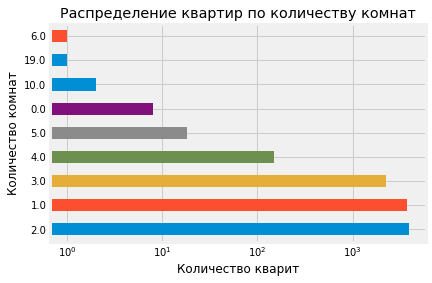

In [6]:
data['Rooms'].value_counts().plot(kind='barh', logx=True)
plt.xlabel('Количество кварит')
plt.ylabel('Количество комнат')
plt.title('Распределение квартир по количеству комнат')
plt.show()

Проверяем квартиры в большим числом комнат

In [7]:
data.loc[(data['Rooms'] == 10) |
         (data['Rooms'] == 19)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,1,74,19083,2,NaN,5,15,1,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,NaN,0,1,1,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,1,1,25,5648,1,30.0,2,4,1,172329.270863


In [8]:
data.loc[(data['Rooms'] == 10) |
         (data['Rooms'] == 19), 'Rooms'] = 1

Ищем среднюю площадь квартиры по количеству комнат

In [9]:
dict_maen_square_per_rooms = {}
for room in np.sort(data['Rooms'].unique()):
    room = int(room)
    dict_maen_square_per_rooms[room] = data.loc[data['Rooms'] == data['Rooms'].unique()[room], 'Square'].median()

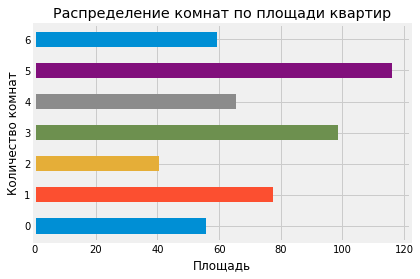

In [10]:
pd.Series(dict_maen_square_per_rooms).plot(kind='barh')
plt.xlabel('Площадь')
plt.ylabel('Количество комнат')
plt.title('Распределение комнат по площади квартир')
plt.show()

In [11]:
data.loc[(data['Rooms'] == 0) &
         (data['Square'] > 100), 'Rooms'] = 6

In [12]:
data.loc[(data['Rooms'] == 0) &
         (data['Square'] < 50), 'Rooms'] = 1

In [13]:
data.loc[(data['Rooms'] == 0), 'Rooms'] = 3


In [14]:
data.loc[(data['Id'] == 14003), 'Rooms'] = 2

#### Square

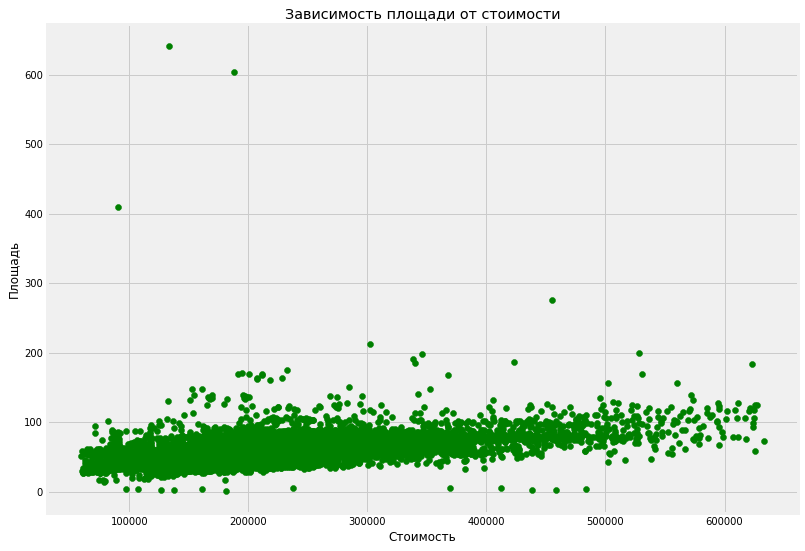

In [16]:
plt.scatter(data['Price'], data['Square'], color = 'green')
plt.xlabel('Стоимость')
plt.ylabel('Площадь')
plt.title('Зависимость площади от стоимости')
rcParams['figure.figsize'] = 12, 9
plt.show()

In [17]:
data = data.drop(data.loc[(data['Square'] < 10)].index, axis=0)

In [18]:
data.loc[(data['Square'] > 300)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,1,1,25,5648,1,30.0,2,4,1,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,1,1,26,3889,6,705.0,3,6,1,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,1,1,22,6398,141,1046.0,3,23,1,133529.681562


In [19]:
data.loc[(data['Square'] > 300), ['Square','LifeSquare']] /= 10

#### KitchenSquare

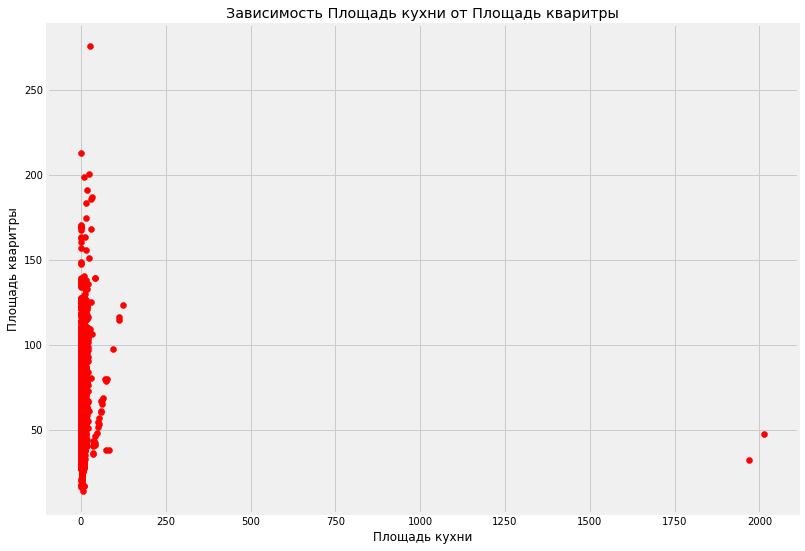

In [23]:
plt.scatter(data['KitchenSquare'], data['Square'], color = 'red')
plt.xlabel('Площадь кухни')
plt.ylabel('Площадь кваритры')
plt.title('Зависимость Площадь кухни от Площадь кваритры')
rcParams['figure.figsize'] = 12, 9
plt.show()

In [24]:
data.loc[(data['KitchenSquare'] > data['Square']), 'KitchenSquare'] = data.loc[(data['Rooms'] == 1), 'KitchenSquare'].median()

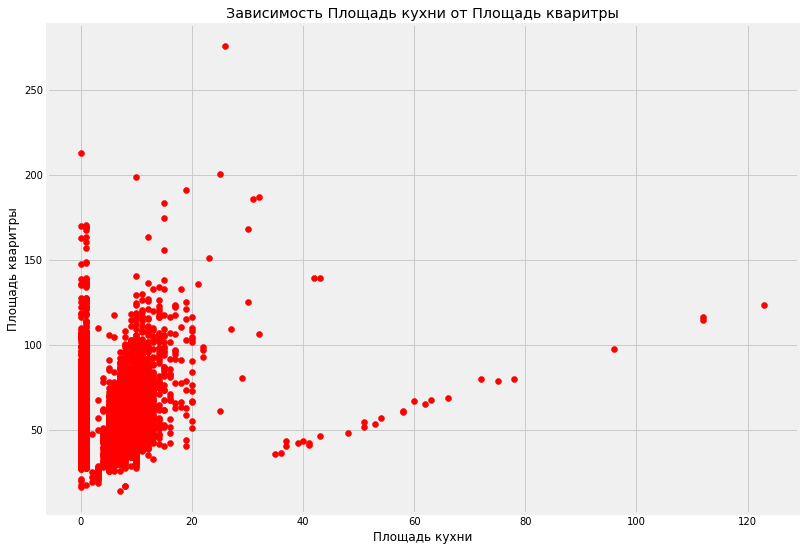

In [25]:
plt.scatter(data['KitchenSquare'], data['Square'], color = 'red')
plt.xlabel('Площадь кухни')
plt.ylabel('Площадь кваритры')
plt.title('Зависимость Площадь кухни от Площадь кваритры')
rcParams['figure.figsize'] = 12, 6
plt.show()

In [26]:
data.loc[(data['KitchenSquare'] > 0.7*data['Square'])].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,1,1,39,10418,9,900.0,1,9,1,370148.625285
551,1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,1,1,5,1564,0,540.0,0,0,1,146950.912410
1077,9690,27,1.0,40.081042,37.834964,37.0,18,19.0,2019,0.211401,1,1,9,1892,0,NaN,0,1,1,93218.650461
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,1,1,2,469,0,NaN,0,0,1,189244.249909
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,1,1,30,5285,0,645.0,6,6,1,438708.707579


Присвоим каждой битой кухне значение площади равной медианной по квартире с такимже количеством комнат

In [27]:
for room in data['Rooms'].unique():
    data.loc[(data['KitchenSquare'] > 0.8*data['Square']) |
             (data['KitchenSquare'] < 3) &
             (data['Rooms'] == room), 'KitchenSquare'] = \
        data.loc[data['Rooms'] == room, 'KitchenSquare'].median()

In [28]:
data.loc[(data['Rooms'] == 6), 'KitchenSquare'] = 20

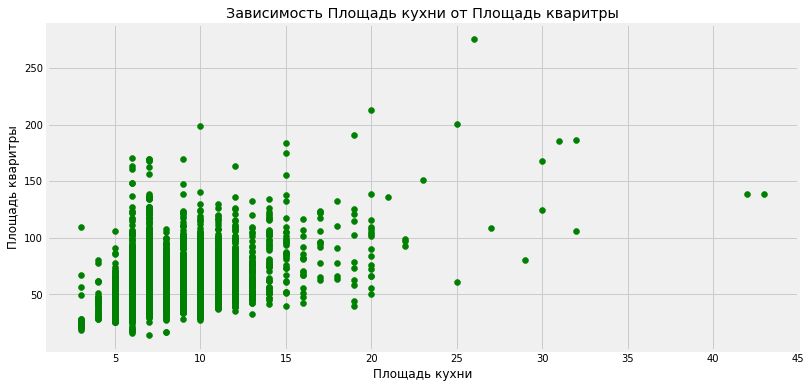

In [29]:
plt.scatter(data['KitchenSquare'], data['Square'], color = 'green')
plt.xlabel('Площадь кухни')
plt.ylabel('Площадь кваритры')
plt.title('Зависимость Площадь кухни от Площадь кваритры')
rcParams['figure.figsize'] = 12, 6
plt.show()

#### Floor

In [30]:
data.loc[data['Floor'] > data['HouseFloor'], 'HouseFloor'] = data.loc[data['Floor'] > data['HouseFloor'], 'Floor']

#### HouseFloor

In [31]:
data.loc[data['HouseFloor'] > 50, 'HouseFloor'] = 9

#### HouseYear

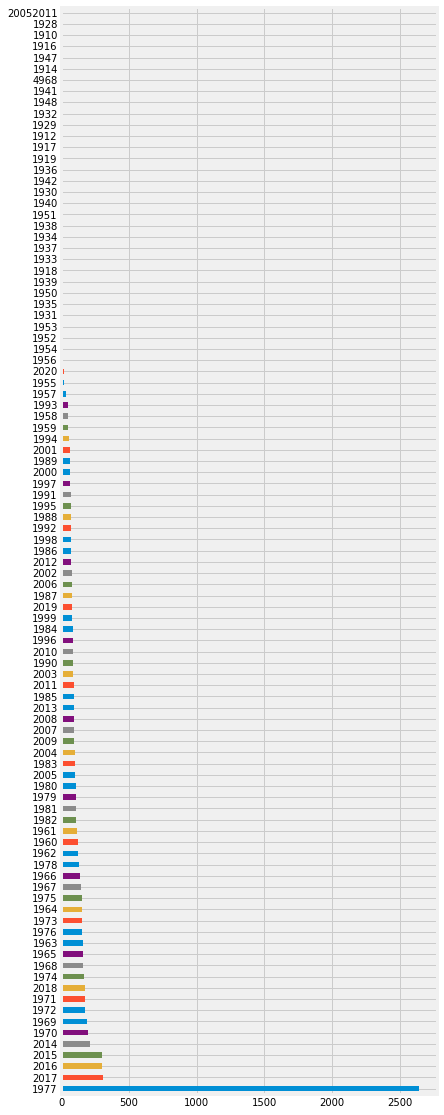

In [33]:
data['HouseYear'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 6, 20

In [34]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2011
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1977

#### Ecology_1

#### Healthcare_1

Применим ML для заполения пробелов

In [35]:
features_for_HC = ('DistrictId', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1',
                   'Social_2','Social_3','Healthcare_1','Helthcare_2','Shops_1', 'Shops_2')

In [36]:
data_for_HC = data.copy()
data_for_HC = data_for_HC.loc[:,features_for_HC]

Разбиваем данный датасет на 2 train test

In [37]:
test_HC = data_for_HC.loc[data_for_HC['Healthcare_1'].isnull()].drop('Healthcare_1' ,axis=1)

In [38]:
train_HC = data_for_HC.loc[data_for_HC['Healthcare_1'].notnull()]

In [39]:
target_HC = train_HC['Healthcare_1']

In [40]:
train_HC = train_HC.drop('Healthcare_1' ,axis=1)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_valid, y_train, y_valid  = train_test_split(train_HC, target_HC, test_size=0.3, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3639, 10), (1560, 10), (3639,), (1560,))

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr_HC = RandomForestRegressor(n_estimators=1000, max_depth=13, random_state=100, n_jobs=-1)

In [44]:
rfr_HC.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [45]:
y_pred = rfr_HC.predict(X_valid)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_pred)

0.9976425603657523

In [47]:
predict_HC = rfr_HC.predict(test_HC)

In [48]:
data.loc[data['Healthcare_1'].isnull(), 'Healthcare_1'] = predict_HC

#### LifeSquare

In [49]:
features_for_LS = ('DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Floor','HouseYear')

In [50]:
valid_data_LS = data.loc[(data['Square'] > data['LifeSquare']) &
                            (data['Square'] < 200) &
                            (data['LifeSquare'] > 10), :]
valid_data_LS.shape

(7205, 20)

In [51]:
data_for_pred_LS = data.loc[~data['Id'].isin(valid_data_LS['Id']),:]

In [52]:
valid_data_LS = valid_data_LS.loc[:,features_for_LS]

In [53]:
data_for_pred_LS = data_for_pred_LS.loc[:,features_for_LS]

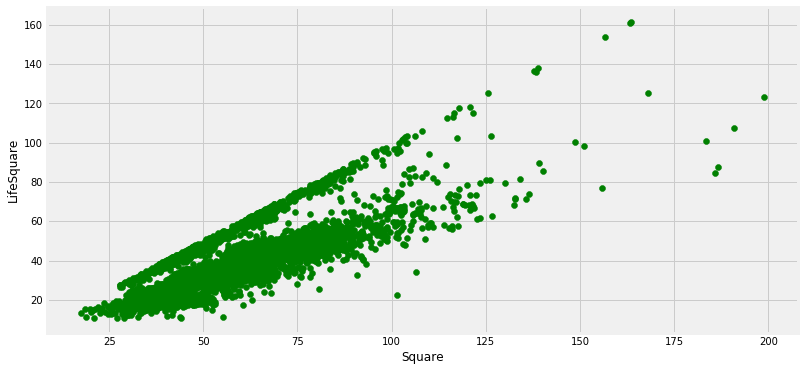

In [56]:
plt.scatter(valid_data_LS['Square'],valid_data_LS['LifeSquare'], color='green')

plt.xlabel('Square')
plt.ylabel('LifeSquare')
rcParams['figure.figsize'] = 12, 6
plt.show()

In [57]:
target_LS = valid_data_LS['LifeSquare']

In [58]:
test_LS = valid_data_LS.drop('LifeSquare', axis=1)

In [59]:
data_for_pred_LS = data_for_pred_LS.drop('LifeSquare', axis=1)

In [60]:
target_LS.shape, test_LS.shape

((7205,), (7205, 7))

In [61]:
X_train, X_valid, y_train, y_valid  = train_test_split(test_LS, target_LS, test_size=0.3, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5043, 7), (2162, 7), (5043,), (2162,))

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters = [{'n_estimators': np.arange(100, 250, 50), 
               'max_features': np.arange(5, 7),
               'max_depth': np.arange(5, 10)}]

In [64]:
#rfr_LS = GridSearchCV(estimator=RandomForestRegressor(random_state=100, n_jobs=-1), 
#                   param_grid=parameters,
#                   scoring='r2',#
#                   cv=5)
#rfr_LS.fit(X_train, y_train)
#rfr_LS.best_params_

In [65]:
rfr_LS = RandomForestRegressor(random_state=100, max_depth=9, max_features=6, n_estimators=100, n_jobs=-1)
rfr_LS.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=100,
           verbose=0, warm_start=False)

In [66]:
y_pred = rfr_LS.predict(X_valid)

In [67]:
r2_score(y_valid, y_pred)

0.8514811122793193

In [68]:
pred_LS = rfr_LS.predict(data_for_pred_LS)

In [69]:
pred_LS.shape

(2783,)

In [70]:
data.loc[data_for_pred_LS.index, 'LifeSquare'] = pred_LS

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 20 columns):
Id               9988 non-null int64
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null int64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null int32
Ecology_3        9988 non-null int32
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null int32
Price            9988 non-null float64
dtypes: float64(8), int32(3), int64(9)
memory usage: 1.7 MB


#### Классифицируем данные

In [72]:
X_train, X_valid, y_train, y_valid  = train_test_split(data.drop(['Price','Id'], axis=1), data['Price'], test_size=0.3, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6991, 18), (2997, 18), (6991,), (2997,))

In [73]:
parameters = [{'n_estimators': np.arange(50,250,50), 
               'max_features': np.arange(5, 11),
               'max_depth': np.arange(10, 15),
               'min_samples_leaf' : np.arange(1, 3)}]

In [74]:
#rfr_glob_CV = GridSearchCV(estimator=RandomForestRegressor(random_state=100, n_jobs=-1), 
#                   param_grid=parameters,
#                   scoring='r2',
#                   cv=5,
#                   n_jobs=-1)
#rfr_glob_CV.fit(X_train, y_train)
#rfr_glob_CV.best_params_

In [75]:
rfr_glob = RandomForestRegressor(max_depth=14, max_features=5, min_samples_leaf=1, n_estimators=200, random_state=100)

In [76]:
rfr_glob.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=100, verbose=0, warm_start=False)

In [77]:
y_pred = rfr_glob.predict(X_valid)

In [78]:
y_pred_1 = rfr_glob.predict(X_train)

In [79]:
r2_score(y_valid, y_pred)

0.7419849616296139

In [80]:
r2_score(y_train, y_pred_1)

0.9277832014494081

Попробуем обучить модель на всех данных

In [81]:
rfr_glob.fit(data.drop(['Price','Id'], axis=1), data['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=100, verbose=0, warm_start=False)

In [82]:
y_pred = rfr_glob.predict(data.drop(['Price','Id'], axis=1))

#### Модель для прогнозирования готова

In [83]:
r2_score(y_pred, data['Price'])

0.8977652925111553

# Импортируем тестовые данные

In [84]:
test = pd.read_csv('test.csv')

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 683.6+ KB


Применим все те же самые методы для test как и для data

In [86]:
test['Ecology_2'] = (test['Ecology_2'] == 'B').astype(int)
test['Ecology_3'] = (test['Ecology_3'] == 'B').astype(int)
test['Shops_2'] = (test['Shops_2'] == 'B').astype(int)

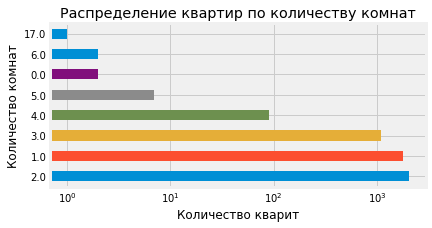

In [88]:
test['Rooms'].value_counts().plot(kind='barh', logx=True)
plt.xlabel('Количество кварит')
plt.ylabel('Количество комнат')
plt.title('Распределение квартир по количеству комнат')
rcParams['figure.figsize'] = 6,3
plt.show()

In [89]:
test.loc[(test['Rooms'] == 17), 'Rooms'] = 2

In [90]:
test.loc[(test['Rooms'] == 0) &
         (test['Square'] > 100), 'Rooms'] = 6

In [91]:
test.loc[(test['Rooms'] == 0), 'Rooms'] = 4

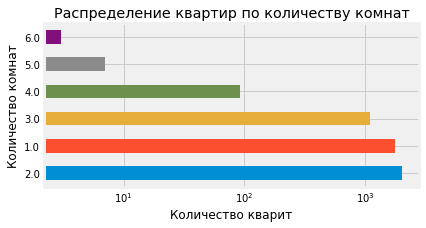

In [92]:
test['Rooms'].value_counts().plot(kind='barh', logx=True)
plt.xlabel('Количество кварит')
plt.ylabel('Количество комнат')
plt.title('Распределение квартир по количеству комнат')
rcParams['figure.figsize'] = 6,3
plt.show()

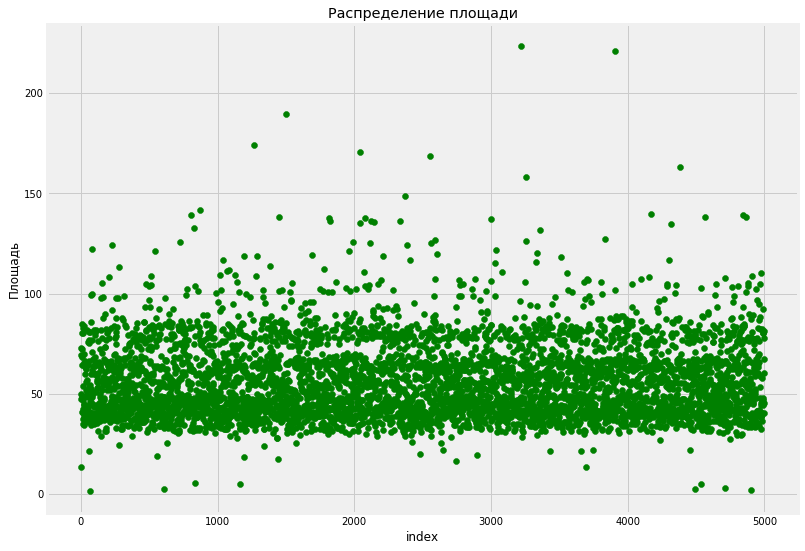

In [94]:
plt.scatter(test.index, test['Square'], color = 'green')
plt.xlabel('index')
plt.ylabel('Площадь')
plt.title('Распределение площади')
rcParams['figure.figsize'] = 12, 9
plt.show()

In [95]:
test.loc[(test['Square'] < 10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,1,1,34,7759,0,229.0,1,3,1
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,1,1,22,6398,141,1046.0,3,23,1
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,1,1,2,469,0,NaN,0,0,1
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,1,1,4,915,0,NaN,0,0,1
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,1,1,5,1564,0,540.0,0,0,1
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,1,1,5,1564,0,540.0,0,0,1
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,1,1,23,5212,6,NaN,3,2,1


In [96]:
test.loc[(test['Square'] < 10), ['Square','LifeSquare']] *= 10

In [97]:
test.loc[(test['Id'] == 170),'LifeSquare'] -=600

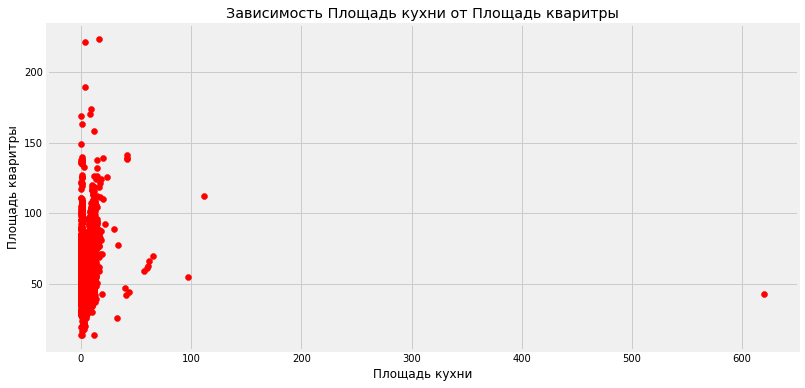

In [99]:
plt.scatter(test['KitchenSquare'], test['Square'], color = 'red')
plt.xlabel('Площадь кухни')
plt.ylabel('Площадь кваритры')
plt.title('Зависимость Площадь кухни от Площадь кваритры')
rcParams['figure.figsize'] = 12, 6
plt.show()

In [100]:
test.loc[(test['KitchenSquare'] > test['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,1,1,28,6533,1,1015.0,2,5,1
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,1,1,31,6119,4,NaN,1,2,1
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,1,1,10,2277,2,1547.0,0,0,1
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,1,1,5,1564,0,540.0,0,0,1


In [101]:
for room in test['Rooms'].unique():
    test.loc[(test['KitchenSquare'] > 0.8*test['Square']) |
             (test['KitchenSquare'] < 3) &
             (test['Rooms'] == room), 'KitchenSquare'] = \
        test.loc[test['Rooms'] == room, 'KitchenSquare'].median()

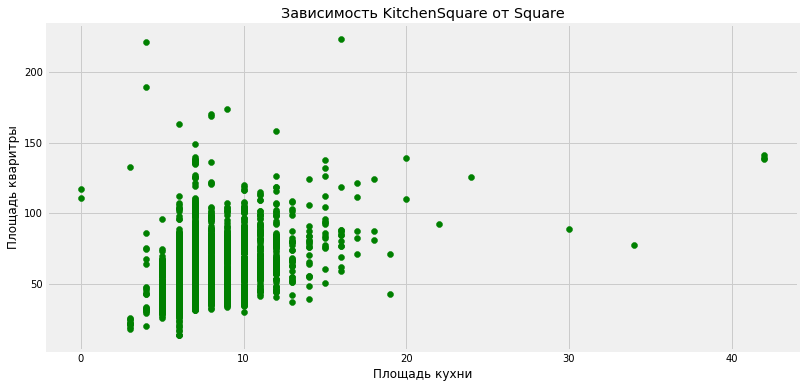

In [102]:
plt.scatter(test['KitchenSquare'], test['Square'], color = 'green')
plt.xlabel('Площадь кухни')
plt.ylabel('Площадь кваритры')
plt.title('Зависимость KitchenSquare от Square')
rcParams['figure.figsize'] = 12, 6
plt.show()

In [103]:
test.loc[test['Floor'] > test['HouseFloor'], 'HouseFloor'] = test.loc[test['Floor'] > test['HouseFloor'], 'Floor']

In [104]:
#data.loc[data['HouseFloor'] > 50, 'HouseFloor'] = 9

In [105]:
test.loc[test['HouseFloor'] > 79, 'HouseFloor'] = 20

In [106]:
test_for_HC = test.copy()
test_for_HC = test_for_HC.loc[:,features_for_HC]

In [107]:
test_HC = test_for_HC.loc[test_for_HC['Healthcare_1'].isnull()].drop('Healthcare_1' ,axis=1)

In [108]:
predict_HC = rfr_HC.predict(test_HC)

In [109]:
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = predict_HC

In [110]:
valid_test_LS = test.loc[(test['Square'] > test['LifeSquare']) &
                            (test['Square'] < 200) &
                            (test['LifeSquare'] > 10), :]
valid_test_LS.shape

(3614, 19)

In [111]:
test_for_pred_LS = test.loc[~test['Id'].isin(valid_test_LS['Id']), :]
test_for_pred_LS.shape

(1386, 19)

In [112]:
valid_test_LS = valid_test_LS.loc[:,features_for_LS]
test_for_pred_LS = test_for_pred_LS.loc[:,features_for_LS]

In [113]:
test_for_pred_LS = test_for_pred_LS.drop('LifeSquare', axis=1)

In [114]:
pred_LS = rfr_LS.predict(test_for_pred_LS)

In [115]:
test.loc[test_for_pred_LS.index, 'LifeSquare'] = pred_LS

In [116]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,591.383000,0,0,1
1,15856,74,2.0,69.263183,54.845401,6.0,6,6.0,1977,0.075779,1,1,6,1437,3,1006.217491,0,2,1
2,5480,190,1.0,13.597819,15.093991,6.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.000000,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,2293.988422,3,3,1
4,14275,27,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,1,1,2,629,1,281.764000,0,0,0


In [117]:
y_pred = rfr_glob.predict(test.drop(['Id'], axis=1))

In [118]:
test['Price'] = y_pred

In [119]:
test.to_csv('ABakulin_predictions_new.csv', columns =['Id','Price'], index=False)